In [0]:
import os; os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/NLP/Latent Semantic Analysis')

In [0]:
from __future__ import print_function, division
from builtins import range

In [0]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

In [16]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [0]:
wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]

In [0]:
stopwords = set([w.rstrip() for w in open('stopwords.txt')]) #create stopword list
# note: an alternative source of stopwords
# from nltk.corpus import stopwords
# stopwords.words('english')

In [0]:
# add more custom stopwords specific to this problem
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

In [0]:
def my_tokenizer(s):
    s = s.lower() #lowercase
    tokens = nltk.tokenize.word_tokenize(s) #split string into words
    tokens = [t for t in tokens if len(t)>2] #remove small words with length <3
    tokens = [ t for t in tokens if t not in stopwords] #remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove words like "3rd edition" etc
    return tokens

In [22]:
#create a word-to-index map so that we can create our word frequency vectors later
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1


print("Number of errors parsing file:", error_count, "number of lines in file:", len(titles))
if error_count == len(titles):
    print("There is no data to do anything with! Quitting...")
    exit()    

Number of errors parsing file: 0 number of lines in file: 2373


In [0]:
#Create input matrices #indicator matrix
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

(2237, 2)


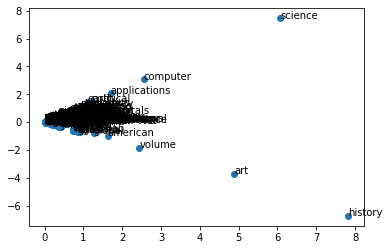

In [25]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

def main():
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    print(Z.shape)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.show()

if __name__ == '__main__':
    main()